In [4]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.decomposition import PCA
random.seed(1)

rna_embeddings = np.loadtxt('./output/exprs_10xPBMC_rna_reverse_normal_filtered_embeddings.txt')
atac_embeddings = np.loadtxt('./output/exprs_10xPBMC_atac_reverse_normal_filtered_embeddings.txt')
print(rna_embeddings.shape)
print(atac_embeddings.shape)
embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)
embeddings=np.nan_to_num(embeddings)

pca = PCA(n_components=30)
pca_result = pca.fit_transform(embeddings)

tsne_results = TSNE(perplexity=30, n_iter = 1000).fit_transform(pca_result)
tsne_results.shape
df = pd.DataFrame()
df['tSNE1'] = tsne_results[:,0]
df['tSNE2'] = tsne_results[:,1]
print("done")


(18406, 64)
(18406, 64)
(36812, 64)


/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


done


In [5]:
pca_result.shape

(36812, 30)

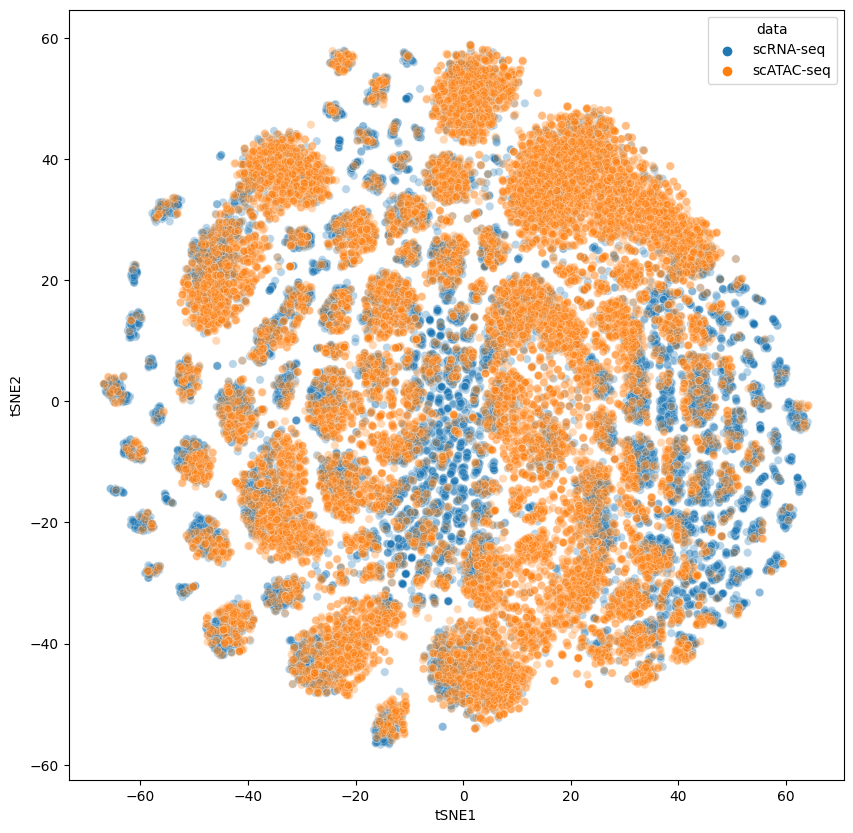

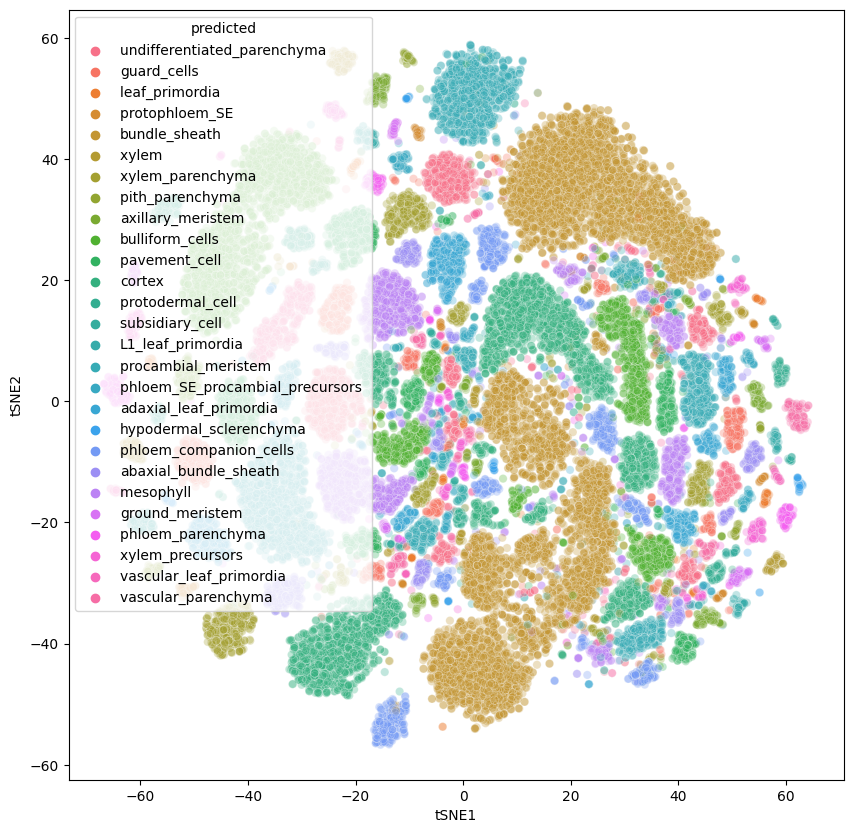

In [6]:
#print(df)
rna_labels = np.loadtxt('./data_10x/cellType_10xPBMC_rna_reverse_normal_filtered_numeric.txt')
atac_predictions = np.loadtxt('./output/exprs_10xPBMC_atac_reverse_normal_filtered_knn_predictions.txt')
labels =  np.concatenate((rna_labels, atac_predictions))
#print(df.shape)
#print(len(rna_labels))
#print(len(atac_predictions))
#print(len(labels))
label_to_idx = pd.read_csv('./data_10x/label_to_idx.txt', sep = '\t', header = None)
label_to_idx.shape
label_dic = []
for i in range(label_to_idx.shape[0]):
    label_dic = np.append(label_dic, label_to_idx[0][i][:-2])

#print(label_dic)
#print(len(label_dic))
#print(labels)
#print(label_dic[labels.astype(int)[39]])

#print(labels)
#print(len(labels))
#print(label_dic[labels.astype(int)])
#print(len(label_dic[labels.astype(int)]))
#for x in labels.astype(int):
#    print(x)
#    print(label_dic[x])

data_label = np.array(["scRNA-seq", "scATAC-seq"])
df['data'] = np.repeat(data_label, [rna_embeddings.shape[0], atac_embeddings.shape[0]], axis=0)
#print(len(labels.astype(int)))
#print(df['data'])
#print(label_dic[labels.astype(int)])
#print(len(df['data']))
#print(label_dic)
#for item in labels:
#    print(item)
#    print(label_dic[item.astype(int)])
#print(labels[1])
#print(label_dic[labels[1].astype(int)])
df['predicted'] = label_dic[labels.astype(int)-1]



plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_reverse/exprs1-4_reverse_normal_filtered.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_reverse/exprs2-4_reverse_normal_filtered.png")

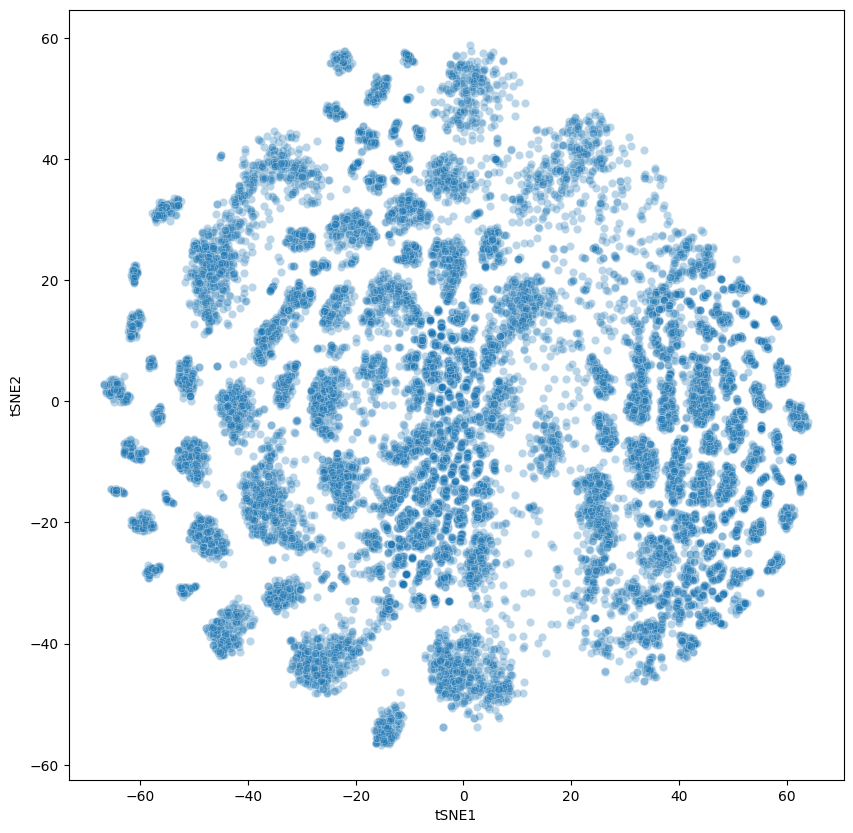

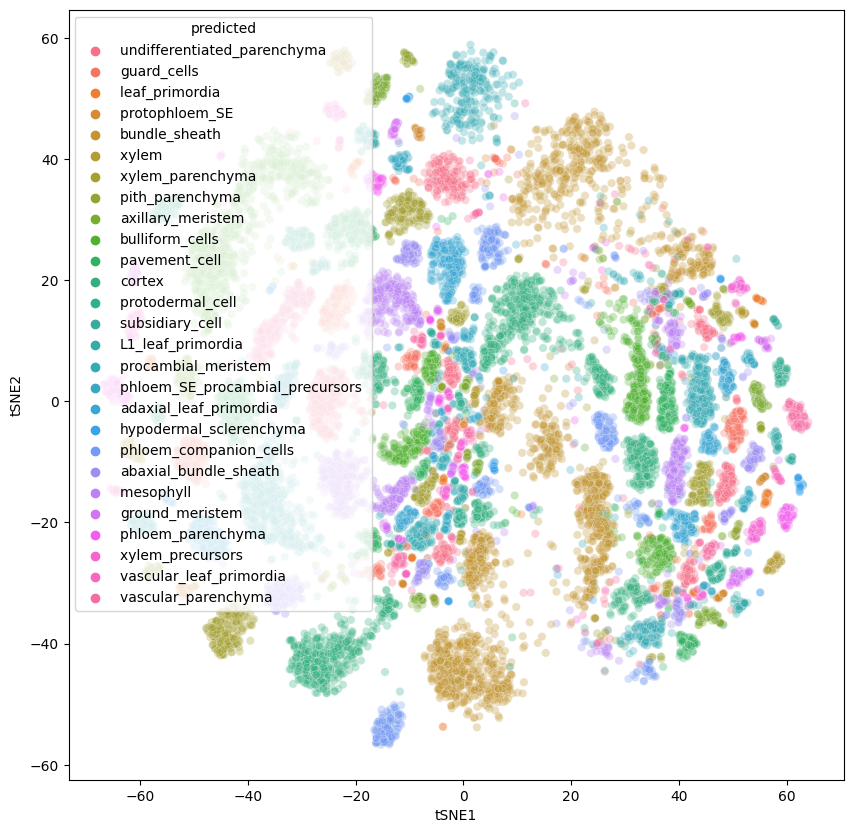

In [7]:
df_modi = df[df.data == "scRNA-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_reverse/result_reverse_normal_filtered_1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_reverse/result_reverse_normal_filtered_2.png")

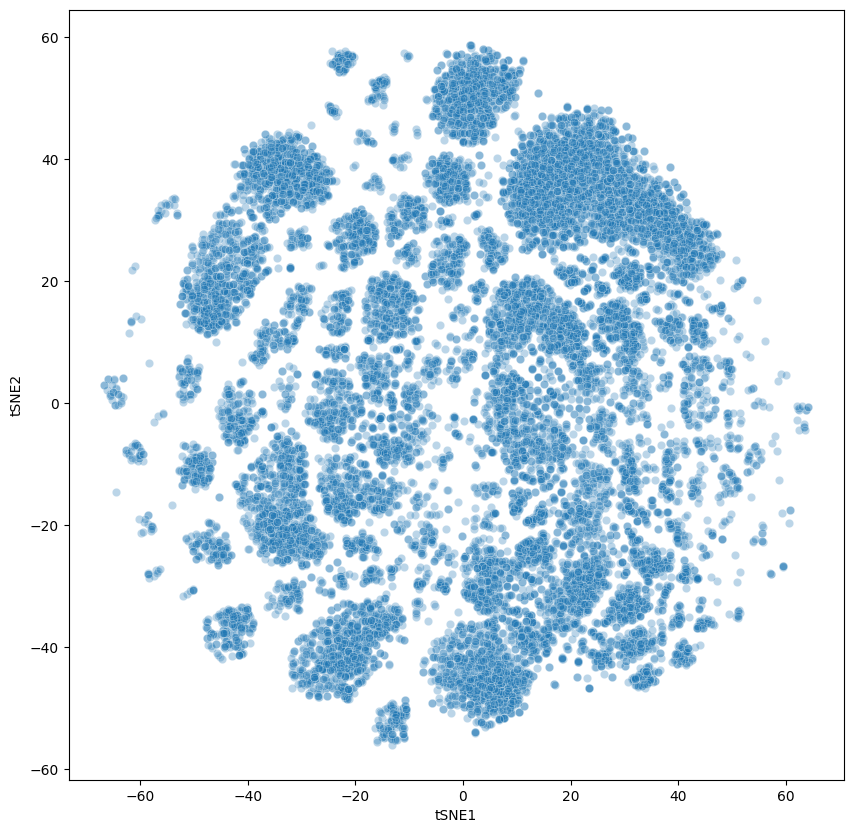

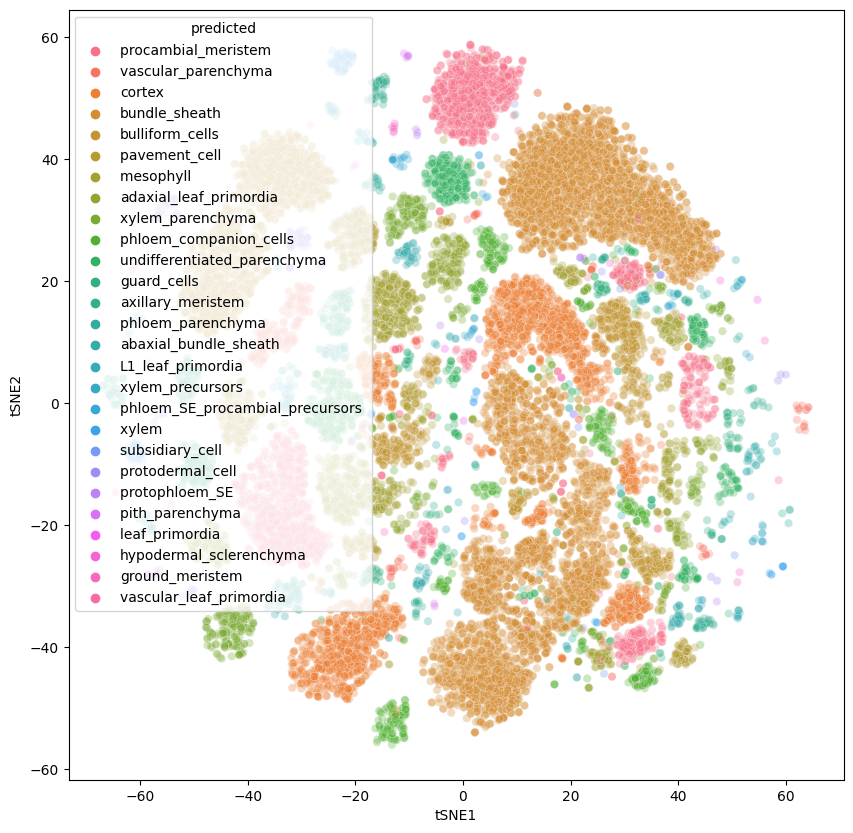

In [8]:
df_modi = df[df.data == "scATAC-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_reverse_normal_filtered_1-2.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_reverse_normal_filtered_2-2.png")

In [9]:
df_modi = df[df.data == "scATAC-seq"]
print(df_modi.predicted)

18406            procambial_meristem 
18407            vascular_parenchyma 
18408                          cortex
18409                          cortex
18410                   bundle_sheath
                     ...             
36807                   bundle_sheath
36808                          cortex
36809                 bulliform_cells
36810    undifferentiated_parenchyma 
36811                   bundle_sheath
Name: predicted, Length: 18406, dtype: object


In [10]:
df_modi = df[df.data == "scRNA-seq"]
print(df_modi.predicted)

0        undifferentiated_parenchyma 
1        undifferentiated_parenchyma 
2        undifferentiated_parenchyma 
3        undifferentiated_parenchyma 
4        undifferentiated_parenchyma 
                     ...             
18401               xylem_parenchyma 
18402    undifferentiated_parenchyma 
18403    undifferentiated_parenchyma 
18404                          cortex
18405            vascular_parenchyma 
Name: predicted, Length: 18406, dtype: object


In [11]:
list_num=[]
with open("reverse_normal_ran_gen_x4_num_filtered.txt", "r") as r1:
    for lines in r1:
        list_num+=[lines.strip("\n")]
#print(list_num)

list_ATAC_label=[]
with open("data/maize_282.v8.3.scATAC_ALL_CELLs.metadata_reference.txt", "r") as r2:
    count=0
    for lines in r2:
        count+=1
        if count>1:
            list_ATAC_label+=[lines.split("\t")[-3]]

list_ATAC_label_fixed=[]
for item in list_num:
    #print(list_ATAC_label[int(item)])
    list_ATAC_label_fixed+=[list_ATAC_label[int(item)-1]]
    
print(list_ATAC_label_fixed)
#print(list_ATAC_label)
    

['phloem_parenchyma', 'phloem_parenchyma', 'protophloem_SE', 'ground_meristem', 'protophloem_SE', 'mesophyll', 'protophloem_SE', 'phloem_SE_procambial_precursors', 'hypodermal_sclerenchyma', 'procambial_meristem', 'ground_meristem', 'xylem_parenchyma', 'mesophyll', 'subsidiary_cells', 'ground_meristem', 'cortex', 'rib_meristem_SAM', 'companion_cell', 'pavement_cell', 'xylem_parenchyma', 'dividing_leaf_primordia', 'procambial_meristem', 'pavement_cell', 'leaf_primordia/cortex', 'axillary_meristem', 'dividing_leaf_primordia', 'phloem_SE_procambial_precursors', 'ground_meristem', 'ground_meristem', 'bundle_sheath', 'mesophyll', 'phloem_parenchyma', 'protophloem_SE', 'dividing_leaf_primordia', 'pavement_cell', 'protophloem_SE', 'cortex/parenchyma', 'mesophyll', 'phloem_parenchyma', 'axillary_meristem', 'cortex', 'xylem_parenchyma', 'hypodermal_sclerenchyma', 'pavement_cell', 'pavement_cell', 'dividing_leaf_primordia', 'phloem_parenchyma', 'phloem_parenchyma', 'ground_meristem', 'early_xyle

In [12]:
list_predicted=[]
for item in df_modi.predicted:
    list_predicted+=[item]

In [13]:
print(list_predicted)

['undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'guard_cells', 'undifferentiated_parenchyma ', 'leaf_primordia ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'protophloem_SE ', 'undifferentiated_parenchyma ', 'bundle_sheath', 'xylem ', 'xylem_parenchyma ', 'undifferentiated_parenchyma ', 'pith_parenchyma ', 'axillary_meristem', 'bulliform_cells', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'bundle_sheath', 'bundle_sheath', 'undifferentiated_parenchyma ', 'bundle_sheath', 'pavement_cell ', 'bulliform_cells', 'protophloem_SE ', 'cortex', 'bulliform_cells'

In [15]:
count=0
for x in range(len(list_predicted)):
    if list_predicted[x]==list_ATAC_label_fixed[x]:
        count+=1
print(count)

225


In [16]:
dict_list={}
for item in list_predicted:
    for item2 in list_ATAC_label_fixed:
    #if item not in dict_list
        if (item,item2) not in dict_list:
            dict_list[item,item2]=1
        else:
            dict_list[item,item2]+=1

In [17]:
import pandas as pd

cols=[]
rows=[]
value=[]
for item in dict_list:
    cols+=[item[1]]
    rows+=[item[0]]
    value+=[dict_list[item[0],item[1]]]
#data ={'area': ['new-hills', 'cape-town', 'mumbai'],
#       'rainfall':[100, 70, 200],
#       'temperature':[20, 25, 39]}
  
#df = pd.DataFrame.from_dict(data, orient ='index') 
#df
#data ={}
dict_list3={}
for item in dict_list:
    dict_list3[item[1]]=0
dict_list4={}
for item in dict_list:
    dict_list4[item[0]]=0
    
dict_list2={}

for item in dict_list4:
    #print(item)
    for item2 in dict_list3:
        #print(item2,item)
        #print((item2,item) in dict_list)
        if item not in dict_list2 and (item,item2) in dict_list:
            dict_list2[item]=[dict_list[item,item2]]
        if item in dict_list2 and (item,item2) in dict_list:
            dict_list2[item]+=[dict_list[item,item2]]
    
#print(rows)
#print(value)

In [18]:
df = pd.DataFrame(dict_list2)

In [19]:
df["idx"]=["rows"]+list(dict_list3)

In [20]:
df.set_index('idx', inplace=True)


In [21]:
df = df.iloc[1: , :]

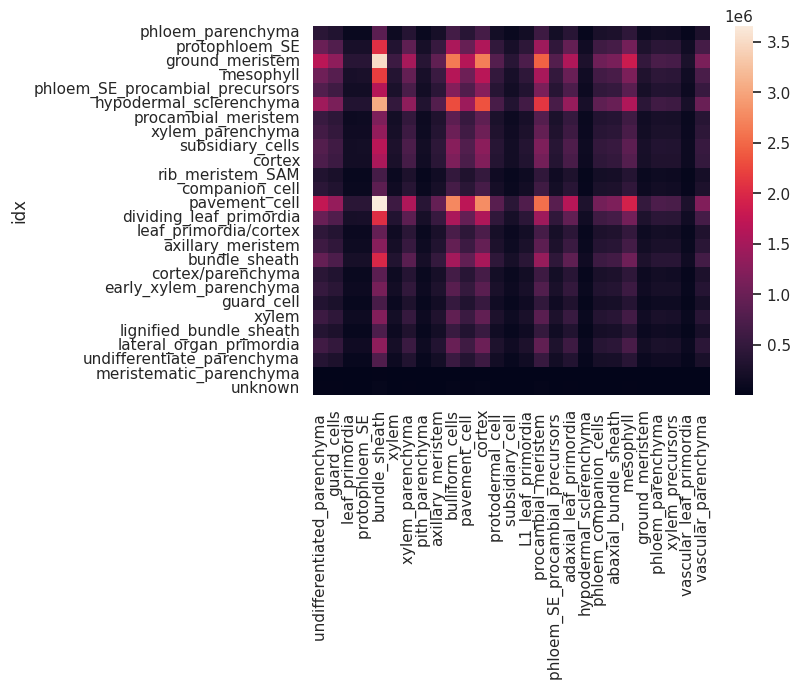

In [22]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
#uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(df,xticklabels=True, yticklabels=True)
fig = ax.get_figure()
#fig.savefig("out.png") 
#plt.tight_layout()
fig.savefig("heatmap_reverse_filtered.png") 